In [19]:
import requests 
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as ps
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import matplotlib.pyplot as mt
import pandas as ps
import numpy as np
import seaborn as sns
import math
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style
np.random.seed(7) # seeding random number generator
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
mt.style.use('ggplot')
import nltk

In [2]:
product_name = input("Enter Your product: ")

Enter Your product: mobile


In [4]:
page_url="https://www.flipkart.com/search?q={}".format(product_name)
scrap_pageno=requests.get(page_url).text
page_web=bs(scrap_pageno)

In [5]:
page_web.find_all("div",class_="_2MImiq")[0].find("span").text.split()[3]

'365'

In [6]:
page_url="https://www.flipkart.com/search?q={}".format(product_name)
scrap_pageno=requests.get(page_url).text
page_web=bs(scrap_pageno)
try:
    page_no=int(page_web.find_all("div",class_="_2MImiq")[0].find("span").text.split()[3])
    
except Exception as e:
    a=page_web.find_all("div",class_="_2MImiq")[0].find("span").text.split()[3].split(",")
    page_no=int(a[0]+a[1])

In [7]:
page_no

365

In [10]:
import requests
from bs4 import BeautifulSoup as bs

final_links = []
reviews = []
product_title = []

for i in range(1, page_no + 1):
    url = "https://www.flipkart.com/search?q={}&page={}".format(product_name, i)
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.162 Safari/537.36"
    }
    webpage = requests.get(url, headers=headers).text
    scrap = requests.get(url).text
    web = bs(scrap)
    
    # Find the product links with the specified class for accessories
    for j in web.find_all("a", class_="s1Q9rs"):
        link = "https://www.flipkart.com" + j.get("href")
        link = link.replace("/p/", "/product-reviews/")
        final_links.append(link)

# Iterate through the collected links and scrape reviews
for k in final_links:
    product_page = requests.get(k).text
    page_web = bs(product_page)
    test = page_web.find_all("div", class_="_2MImiq _1Qnn1K")
    
    if len(test) > 0:
        try:
            pro_page_no = int(page_web.find_all("div", class_="_2MImiq _1Qnn1K")[0].find("span").text.split()[3])
        except Exception as e:
            pro_ex = page_web.find_all("div", class_="_2MImiq _1Qnn1K")[0].find("span").text.split()[3].split(",")
            pro_page_no = int(pro_ex[0] + pro_ex[1])
    else:
        pro_page_no = 1
    
    for t in range(1,2):
        scrap = requests.get(k + "&page={}".format(t)).text
        pro_web = bs(scrap)
        
        for l in pro_web.find_all("p", class_="_2-N8zT"):
            reviews.append(l.text)
            try:
                product_title.append(pro_web.find("div", class_="_2s4DIt _1CDdy2").text)
            except:
                product_title.append("no name")
                

In [8]:
# Pipeline for data fetching from website
# import requests
# from bs4 import BeautifulSoup as bs

# final_links = []
# reviews = []
# product_title = []

# for i in range(1, page_no + 1):
#     url = "https://www.flipkart.com/search?q={}&page={}".format(product_name, i)
#     headers = {
#         "User-Agent": "Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.162 Safari/537.36"
#     }
#     webpage = requests.get(url, headers=headers).text
#     scrap = requests.get(url).text
#     web = bs(scrap)
    
#     for j in web.find_all("a", class_="_1fQZEK"):
#         link = "https://www.flipkart.com" + j.get("href")
#         link = link.replace("/p/", "/product-reviews/")
#         final_links.append(link)
# else:
#     for k in final_links:
#         product_page = requests.get(k).text
#         page_web = bs(product_page)
#         test = page_web.find_all("div", class_="_2MImiq _1Qnn1K")
        
#         if len(test) > 0:
#             try:
#                 pro_page_no = int(page_web.find_all("div", class_="_2MImiq _1Qnn1K")[0].find("span").text.split()[3])
#             except Exception as e:
#                 pro_ex = page_web.find_all("div", class_="_2MImiq _1Qnn1K")[0].find("span").text.split()[3].split(",")
#                 pro_page_no = int(pro_ex[0] + pro_ex[1])
#         else:
#             pro_page_no = 1
        
#         for t in range(1,2):
#             scrap = requests.get(k + "&page={}".format(t)).text
#             pro_web = bs(scrap)
            
#             for l in pro_web.find_all("p", class_="_2-N8zT"):
#                 reviews.append(l.text)
#                 try:
#                     product_title.append(pro_web.find("div", class_="_2s4DIt _1CDdy2").text)
#                 except:
#                     product_title.append("no name")

In [ ]:
pro_web.find("a",class_="s1Q9rs")

In [ ]:
pro_web.find("div",class_="_2s4DIt _1CDdy2")

In [13]:
# pro_page_no+1

In [14]:
len(reviews)

0

In [15]:
len(product_title)

0

In [ ]:
import pandas as ps
fd=ps.DataFrame({"product_title":product_title,"reviews":reviews})
fd.head()

In [17]:
fd.to_csv(r"D:\capstone\2\accessories.csv")

In [68]:
fd.to_csv(r"D:\capstone\2\vivo.csv")

In [69]:
fd.to_csv(r"D:\capstone\2\refrigerators.csv")

In [70]:
fd.to_csv(r"D:\capstone\2\IFB_.csv")

In [71]:
fd.to_csv(r"D:\capstone\2\IFB.csv")

In [72]:
fd.to_csv(r"D:\capstone\2\LG.csv")

In [73]:
fd.to_csv(r"D:\capstone\2\vu.csv")

In [74]:
fd.to_csv(r"D:\capstone\2\laptops.csv")

In [75]:
fd.to_csv(r"D:\capstone\2\jabbaaaa.csv")

In [76]:
fd.to_csv(r"D:\capstone\2\washing_machines.csv")

In [77]:
fd.to_csv(r"D:\capstone\2\mi_mobiles.csv")

In [78]:
fd.to_csv(r"D:\capstone\2\iphone_1.csv")

In [79]:
fd.to_csv(r"D:\capstone\2\oneplusmobile.csv")

In [80]:
fd.to_csv(r"D:\capstone\2\iphone.csv")

In [81]:
fd.to_csv(r"D:\capstone\2\samsungtv.csv")

In [82]:
ps.set_option("display.max_rows",None)

In [20]:
df=ps.read_csv(r"D:\capstone\2\washing_machines.csv")
df.head()

,Unnamed: 0,product_title,reviews
0,0,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Best in the market!
1,1,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product
2,2,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!
3,3,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Worth every penny
4,4,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Just wow!


In [21]:
df1=ps.read_csv(r"D:\capstone\2\iphone_1.csv")
df1.head()

,Unnamed: 0,product_title,reviews
0,0,"APPLE iPhone 13 (Starlight, 128 GB) Reviews",Mind-blowing purchase
1,1,"APPLE iPhone 13 (Starlight, 128 GB) Reviews",Very Good
2,2,"APPLE iPhone 13 (Starlight, 128 GB) Reviews",Best in the market!
3,3,"APPLE iPhone 13 (Starlight, 128 GB) Reviews",Excellent
4,4,"APPLE iPhone 13 (Starlight, 128 GB) Reviews",Brilliant


In [22]:
df2=ps.read_csv(r"D:\capstone\2\mi_mobiles.csv")
df2.head()

,Unnamed: 0,product_title,reviews
0,0,"REDMI 10 Power (Sporty Orange, 128 GB) Reviews",Nice product
1,1,"REDMI 10 Power (Sporty Orange, 128 GB) Reviews",Nice product
2,2,"REDMI 10 Power (Sporty Orange, 128 GB) Reviews",Nice
3,3,"REDMI 10 Power (Sporty Orange, 128 GB) Reviews",Delightful
4,4,"REDMI 10 Power (Sporty Orange, 128 GB) Reviews",Moderate


In [23]:
df3=ps.read_csv(r"D:\capstone\2\oneplusmobile.csv")
df3.head()

,Unnamed: 0,product_title,reviews
0,0,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB) ...",Must buy!
1,1,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB) ...",Delightful
2,2,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB) ...",Nice product
3,3,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB) ...",Decent product
4,4,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB) ...",Nice product


In [24]:
df4=ps.read_csv(r"D:\capstone\2\iphone.csv")
df4.head()

,Unnamed: 0,product_title,reviews
0,0,"Apple 20W ,USB-C Power Charging Adapter for iP...",Just wow!
1,1,"Apple 20W ,USB-C Power Charging Adapter for iP...",Worth the money
2,2,"Apple 20W ,USB-C Power Charging Adapter for iP...",Terrific purchase
3,3,"Apple 20W ,USB-C Power Charging Adapter for iP...",Must buy!
4,4,"Apple 20W ,USB-C Power Charging Adapter for iP...",Great product


In [25]:
df5=ps.read_csv(r"D:\capstone\2\samsungtv.csv")
df5.head()

,Unnamed: 0,product_title,reviews
0,0,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB) Rev...",Simply awesome
1,1,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB) Rev...",Worth every penny
2,2,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB) Rev...",Nice product
3,3,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB) Rev...",Fabulous!
4,4,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB) Rev...",Awesome


In [26]:
df6=ps.read_csv(r"D:\capstone\2\jabbaaaa.csv")
df6.head()

,Unnamed: 0,product_title,reviews
0,0,"APPLE iPhone 13 (Midnight, 128 GB) Reviews",Perfect product!
1,1,"APPLE iPhone 13 (Midnight, 128 GB) Reviews",Perfect product!
2,2,"APPLE iPhone 13 (Midnight, 128 GB) Reviews",Brilliant
3,3,"APPLE iPhone 13 (Midnight, 128 GB) Reviews",Excellent
4,4,"APPLE iPhone 13 (Midnight, 128 GB) Reviews",Fabulous!


In [27]:
df7=ps.read_csv(r"D:\capstone\2\vu.csv")
df7.head(10)

,Unnamed: 0,product_title,reviews
0,0,Vu Premium TV 108 cm (43 inch) Full HD LED Sma...,Simply awesome
1,1,Vu Premium TV 108 cm (43 inch) Full HD LED Sma...,Terrific
2,2,Vu Premium TV 108 cm (43 inch) Full HD LED Sma...,Wonderful
3,3,Vu Premium TV 108 cm (43 inch) Full HD LED Sma...,Highly recommended
4,4,Vu Premium TV 108 cm (43 inch) Full HD LED Sma...,Don't waste your money
5,5,Vu Premium TV 108 cm (43 inch) Full HD LED Sma...,Did not meet expectations
6,6,Vu Premium TV 108 cm (43 inch) Full HD LED Sma...,Really Nice
7,7,Vu Premium TV 108 cm (43 inch) Full HD LED Sma...,Worth every penny
8,8,Vu Premium TV 108 cm (43 inch) Full HD LED Sma...,Wonderful
9,9,Vu Premium TV 108 cm (43 inch) Full HD LED Sma...,Classy product


In [28]:
df8=ps.read_csv(r"D:\capstone\2\laptops.csv")
df8.head(10)

,Unnamed: 0,product_title,reviews
0,0,Primebook 4G Android Based MediaTek MT8788 - (...,Simply awesome
1,1,Primebook 4G Android Based MediaTek MT8788 - (...,Terrific
2,2,Primebook 4G Android Based MediaTek MT8788 - (...,Awesome
3,3,Primebook 4G Android Based MediaTek MT8788 - (...,Worth every penny
4,4,Primebook 4G Android Based MediaTek MT8788 - (...,Very Good
5,5,Primebook 4G Android Based MediaTek MT8788 - (...,Fabulous!
6,6,Primebook 4G Android Based MediaTek MT8788 - (...,Terrific
7,7,Primebook 4G Android Based MediaTek MT8788 - (...,Super!
8,8,Primebook 4G Android Based MediaTek MT8788 - (...,Must buy!
9,9,Primebook 4G Android Based MediaTek MT8788 - (...,Awesome


In [29]:
df9=ps.read_csv(r"D:\capstone\2\LG.csv")
df9.head(10)

,Unnamed: 0,product_title,reviews
0,0,LG AI Convertible 6-in-1 Cooling 2023 Model 1....,Pretty good
1,1,LG AI Convertible 6-in-1 Cooling 2023 Model 1....,Perfect product!
2,2,LG AI Convertible 6-in-1 Cooling 2023 Model 1....,Must buy!
3,3,LG AI Convertible 6-in-1 Cooling 2023 Model 1....,Super!
4,4,LG AI Convertible 6-in-1 Cooling 2023 Model 1....,Value-for-money
5,5,LG AI Convertible 6-in-1 Cooling 2023 Model 1....,Classy product
6,6,LG AI Convertible 6-in-1 Cooling 2023 Model 1....,Very Good
7,7,LG AI Convertible 6-in-1 Cooling 2023 Model 1....,Excellent
8,8,LG AI Convertible 6-in-1 Cooling 2023 Model 1....,Super!
9,9,LG AI Convertible 6-in-1 Cooling 2023 Model 1....,Fabulous!


In [30]:
df10=ps.read_csv(r"D:\capstone\2\IFB.csv")
df10.head(10)

,Unnamed: 0,product_title,reviews
0,0,"IFB 9 kg 2X Power Dual Steam, Hard Water Wash,...",Fabulous!
1,1,"IFB 9 kg 2X Power Dual Steam, Hard Water Wash,...",Must buy!
2,2,"IFB 9 kg 2X Power Dual Steam, Hard Water Wash,...",Nice
3,3,"IFB 9 kg 2X Power Dual Steam, Hard Water Wash,...",Best in the market!
4,4,"IFB 9 kg 2X Power Dual Steam, Hard Water Wash,...",Hated it!
5,5,"IFB 9 kg 2X Power Dual Steam, Hard Water Wash,...",Fabulous!
6,6,"IFB 9 kg 2X Power Dual Steam, Hard Water Wash,...",Fabulous!
7,7,"IFB 9 kg 2X Power Dual Steam, Hard Water Wash,...",Classy product
8,8,"IFB 9 kg 2X Power Dual Steam, Hard Water Wash,...",Fabulous!
9,9,"IFB 9 kg 2X Power Dual Steam, Hard Water Wash,...",Wonderful


In [31]:
df11=ps.read_csv(r"D:\capstone\2\IFB_.csv")
df11.head(10)

,Unnamed: 0,product_title,reviews
0,0,IFB 8 kg 5 Star 9 Swirl AI Powered with Wi-Fi ...,Delightful
1,1,IFB 8 kg 5 Star 9 Swirl AI Powered with Wi-Fi ...,Best in the market!
2,2,IFB 8 kg 5 Star 9 Swirl AI Powered with Wi-Fi ...,Must buy!
3,3,IFB 8 kg 5 Star 9 Swirl AI Powered with Wi-Fi ...,Great product
4,4,IFB 8 kg 5 Star 9 Swirl AI Powered with Wi-Fi ...,Really Nice
5,5,IFB 8 kg 5 Star 9 Swirl AI Powered with Wi-Fi ...,Mind-blowing purchase
6,6,IFB 8 kg 5 Star 9 Swirl AI Powered with Wi-Fi ...,Awesome
7,7,IFB 8 kg 5 Star 9 Swirl AI Powered with Wi-Fi ...,Mind-blowing purchase
8,8,IFB 8 kg 5 Star 9 Swirl AI Powered with Wi-Fi ...,Great product
9,9,IFB 8 kg 5 Star 9 Swirl AI Powered with Wi-Fi ...,Just wow!


In [32]:
df12=ps.read_csv(r"D:\capstone\2\refrigerators.csv")
df12.head(10)

,Unnamed: 0,product_title,reviews
0,0,FABER HOOD PLUTO PB BF BK 60 Wall Mounted Chim...,Worth every penny
1,1,FABER HOOD PLUTO PB BF BK 60 Wall Mounted Chim...,Excellent
2,2,FABER HOOD PLUTO PB BF BK 60 Wall Mounted Chim...,Perfect product!
3,3,FABER HOOD PLUTO PB BF BK 60 Wall Mounted Chim...,Horrible
4,4,FABER HOOD PLUTO PB BF BK 60 Wall Mounted Chim...,Excellent
5,5,FABER HOOD PLUTO PB BF BK 60 Wall Mounted Chim...,Great product
6,6,FABER HOOD PLUTO PB BF BK 60 Wall Mounted Chim...,Highly recommended
7,7,FABER HOOD PLUTO PB BF BK 60 Wall Mounted Chim...,Super!
8,8,FABER HOOD PLUTO PB BF BK 60 Wall Mounted Chim...,Best in the market!
9,9,FABER HOOD PLUTO PB BF BK 60 Wall Mounted Chim...,Highly recommended


In [33]:
df13=ps.read_csv(r"D:\capstone\2\vivo.csv")
df13.head(10)

,Unnamed: 0,product_title,reviews
0,0,Caseex Back Cover for Apple iPhone 13 Reviews,Super!
1,1,Caseex Back Cover for Apple iPhone 13 Reviews,Not recommended at all
2,2,Caseex Back Cover for Apple iPhone 13 Reviews,Perfect product!
3,3,Caseex Back Cover for Apple iPhone 13 Reviews,Wonderful
4,4,Caseex Back Cover for Apple iPhone 13 Reviews,Wonderful
5,5,Caseex Back Cover for Apple iPhone 13 Reviews,Awesome
6,6,Caseex Back Cover for Apple iPhone 13 Reviews,Not good
7,7,Caseex Back Cover for Apple iPhone 13 Reviews,Terrific
8,8,Caseex Back Cover for Apple iPhone 13 Reviews,Awesome
9,9,Caseex Back Cover for Apple iPhone 13 Reviews,Best in the market!


In [34]:
df14=ps.read_csv(r"D:\capstone\2\accessories.csv")
df14.head(10)

,Unnamed: 0,product_title,reviews
0,0,"CEDO XPRO Flip Cover for Vivo T1 Pro, IQoo Z6 ...",Great product
1,1,"CEDO XPRO Flip Cover for Vivo T1 Pro, IQoo Z6 ...",Worth the money
2,2,"CEDO XPRO Flip Cover for Vivo T1 Pro, IQoo Z6 ...",Nice
3,3,"CEDO XPRO Flip Cover for Vivo T1 Pro, IQoo Z6 ...",Simply awesome
4,4,"CEDO XPRO Flip Cover for Vivo T1 Pro, IQoo Z6 ...",Just wow!
5,5,"CEDO XPRO Flip Cover for Vivo T1 Pro, IQoo Z6 ...",Excellent
6,6,"CEDO XPRO Flip Cover for Vivo T1 Pro, IQoo Z6 ...",Super!
7,7,"CEDO XPRO Flip Cover for Vivo T1 Pro, IQoo Z6 ...",Perfect product!
8,8,"CEDO XPRO Flip Cover for Vivo T1 Pro, IQoo Z6 ...",Mind-blowing purchase
9,9,"CEDO XPRO Flip Cover for Vivo T1 Pro, IQoo Z6 ...",Brilliant


In [38]:
df15=ps.read_csv(r"D:\capstone\2\earphones.csv")
df15.head(10)

,Unnamed: 0,product_title,reviews
0,0,Aroma NB119C Carter 48 Hours Playing Time Fast...,Value-for-money
1,1,Aroma NB119C Carter 48 Hours Playing Time Fast...,Terrific purchase
2,2,Aroma NB119C Carter 48 Hours Playing Time Fast...,Value-for-money
3,3,Aroma NB119C Carter 48 Hours Playing Time Fast...,Wonderful
4,4,Aroma NB119C Carter 48 Hours Playing Time Fast...,Wonderful
5,5,Aroma NB119C Carter 48 Hours Playing Time Fast...,Awesome
6,6,Aroma NB119C Carter 48 Hours Playing Time Fast...,Nice product
7,7,Aroma NB119C Carter 48 Hours Playing Time Fast...,Does the job
8,8,Aroma NB119C Carter 48 Hours Playing Time Fast...,Fabulous!
9,9,Aroma NB119C Carter 48 Hours Playing Time Fast...,Great product


In [39]:
fd=ps.concat([df, df1, df2, df3, df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15],ignore_index=True)
fd.head()

,Unnamed: 0,product_title,reviews
0,0,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Best in the market!
1,1,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product
2,2,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!
3,3,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Worth every penny
4,4,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Just wow!


In [40]:
fd.shape

(309390, 3)

In [41]:
fd.reset_index(inplace=True)

In [42]:
fd.head()

,index,Unnamed: 0,product_title,reviews
0,0,0,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Best in the market!
1,1,1,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product
2,2,2,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!
3,3,3,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Worth every penny
4,4,4,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Just wow!


In [43]:
fd.shape

(309390, 4)

In [44]:
fd.drop(["Unnamed: 0"],axis=1,inplace=True)

In [45]:
example = fd['reviews'][69]
print(example)

Awesome


In [46]:
fd['reviews']

0         Best in the market!
1               Great product
2                      Super!
3           Worth every penny
4                   Just wow!
                 ...         
309385               Moderate
309386         Simply awesome
309387         Unsatisfactory
309388        Waste of money!
309389                 Super!
Name: reviews, Length: 309390, dtype: object

In [47]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Awesome']

In [48]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Awesome', 'NNP')]

In [49]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S (GPE Awesome/NNP))


In [50]:
fd.head()

,index,product_title,reviews
0,0,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Best in the market!
1,1,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product
2,2,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!
3,3,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Worth every penny
4,4,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Just wow!


In [51]:
fd.drop(["index"],axis=1,inplace=True)

In [52]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [53]:
sia.polarity_scores('I am at my worst!')

{'neg': 0.594, 'neu': 0.406, 'pos': 0.0, 'compound': -0.6588}

In [54]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [55]:
sia.polarity_scores(fd.iloc[69]['reviews'])

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249}

In [56]:
fd["reviews"].value_counts()

reviews
Wonderful                                             15811
Great product                                         11185
Must buy!                                             10970
Classy product                                        10838
Best in the market!                                   10557
                                                      ...  
Instead if we go for Honor 4x it better and cheap         1
one pluse one is the best one...                          1
Fake information about this phone                         1
Not worth the price.  Seems like 9-10k value phone        1
Amazingly awesome                                         1
Name: count, Length: 2455, dtype: int64

In [57]:
fd.iloc[60]['reviews']

'Brilliant'

In [58]:
fd['scores'] = fd['reviews'].apply(lambda reviews: sia.polarity_scores(reviews) if not isinstance(reviews, float) else None)

fd.head()

,product_title,reviews,scores
0,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Best in the market!,"{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound..."
1,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."
2,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
3,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Worth every penny,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp..."
4,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Just wow!,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."


In [59]:
fd.shape

(309390, 3)

In [60]:
fd['reviews']=="no name"

0         False
1         False
2         False
3         False
4         False
          ...  
309385    False
309386    False
309387    False
309388    False
309389    False
Name: reviews, Length: 309390, dtype: bool

In [61]:
fd['compound'] = fd['scores'].apply(lambda score_dict: score_dict['compound'] if score_dict is not None else None)
fd.head()

,product_title,reviews,scores,compound
0,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Best in the market!,"{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...",0.6696
1,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249
2,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6360
3,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Worth every penny,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.2263
4,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Just wow!,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6239


In [62]:
fd['comp_score'] = fd['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

fd.head(10)

,product_title,reviews,scores,compound,comp_score
0,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Best in the market!,"{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...",0.6696,pos
1,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,pos
2,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6360,pos
3,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Worth every penny,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.2263,pos
4,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Just wow!,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6239,pos
5,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6360,pos
6,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Awesome,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6249,pos
7,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Mind-blowing purchase,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
8,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,pos
9,no name,Perfect product!,"{'neg': 0.0, 'neu': 0.2, 'pos': 0.8, 'compound...",0.6114,pos


In [63]:
fd.comp_score.value_counts()

comp_score
pos    280009
neg     29381
Name: count, dtype: int64

In [64]:
29226/277048
# we can see that barely see that it is the matter of data imbalance

0.10549074528601542

In [65]:
fd.head()

,product_title,reviews,scores,compound,comp_score
0,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Best in the market!,"{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...",0.6696,pos
1,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,pos
2,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6360,pos
3,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Worth every penny,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.2263,pos
4,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Just wow!,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6239,pos


In [66]:
fd.isnull().sum()/len(fd)*100

product_title    0.000000
reviews          0.003879
scores           0.003879
compound         0.003879
comp_score       0.000000
dtype: float64

In [67]:
fd.dropna(subset=['reviews', 'scores', 'compound'], inplace=True)

In [68]:
fd.describe()

,compound
count,309378.000000
mean,0.346385
std,0.345509
min,-0.863300
25%,0.226300
50%,0.476700
75%,0.611400
max,0.949100


In [69]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 309378 entries, 0 to 309389
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   product_title  309378 non-null  object 
 1   reviews        309378 non-null  object 
 2   scores         309378 non-null  object 
 3   compound       309378 non-null  float64
 4   comp_score     309378 non-null  object 
dtypes: float64(1), object(4)
memory usage: 14.2+ MB


In [70]:
fd.groupby('comp_score').describe()

compound                                                      \
               count      mean       std     min     25%     50%     75%   
comp_score                                                                 
neg          29369.0 -0.480869  0.138183 -0.8633 -0.5423 -0.4767 -0.4228   
pos         280009.0  0.433153  0.224916  0.0000  0.2716  0.4767  0.6114   

                    
               max  
comp_score          
neg        -0.0127  
pos         0.9491

In [71]:
# Now we are managing our data to make it balance
fd_neg = fd[fd['comp_score']=='neg']
fd_neg.shape

(29369, 5)

In [72]:
fd_pos = fd[fd['comp_score']=='pos']
fd_pos.shape

(280009, 5)

In [73]:
fd_pos_downsampled = fd_pos.sample(fd_neg.shape[0])
fd_pos_downsampled.shape

(29369, 5)

In [74]:
fd_balanced = ps.concat([fd_pos_downsampled, fd_neg])
fd_balanced.shape

(58738, 5)

In [75]:
# Now we have balanced data through which we are not going to have any overfitting problem
fd_balanced['comp_score'].value_counts()

comp_score
pos    29369
neg    29369
Name: count, dtype: int64

In [76]:
fd_balanced['neg']=fd_balanced['comp_score'].apply(lambda x: 1 if x=='neg' else 0)
fd_balanced.sample(10)

,product_title,reviews,scores,compound,comp_score,neg
13155,Whirlpool 11 kg Semi Automatic Top Load Washin...,Wonderful,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5719,pos,0
15166,"MarQ by Flipkart 7.5 kg Washer only White, Gre...",Horrible,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",-0.5423,neg,1
23841,SAMSUNG 7.5 kg Wobble Technology with Diamond ...,Pretty good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.7269,pos,0
248942,realme Buds Classic RMA2001 Wired Earphones wi...,Useless product,"{'neg': 0.737, 'neu': 0.263, 'pos': 0.0, 'comp...",-0.4215,neg,1
228389,"IFB 8 kg 5 Star AI Powered, 4 years Comprehens...",Terrible product,"{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'comp...",-0.4767,neg,1
63999,"Mi 10i (Atlantic Blue, 128 GB) Reviews",Utterly Disappointed,"{'neg': 0.772, 'neu': 0.228, 'pos': 0.0, 'comp...",-0.5256,neg,1
93621,"SAMSUNG Galaxy F22 (Denim Black, 128 GB) Reviews",Terrific,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4767,pos,0
293428,U&i Key Series 20hrs Wireless Earphone with Mi...,Brilliant,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5859,pos,0
2584,no name,Great product,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,pos,0
14036,"Midea 8 kg Spin Dry Dark Full Metal Body, Soft...",Useless product,"{'neg': 0.737, 'neu': 0.263, 'pos': 0.0, 'comp...",-0.4215,neg,1


In [77]:
fd_balanced.shape

(58738, 6)

In [78]:
ps.set_option('display.max_colwidth', None)

In [79]:
# Print the DataFrame with full product names
print(fd_balanced['product_title'].tail())

309333    boAt Rockerz 235 Pro with upto 20 Hours Playback & ASAP Charge Bluetooth Headset Reviews
309346    boAt Rockerz 235 Pro with upto 20 Hours Playback & ASAP Charge Bluetooth Headset Reviews
309372    boAt Rockerz 235 Pro with upto 20 Hours Playback & ASAP Charge Bluetooth Headset Reviews
309375    boAt Rockerz 235 Pro with upto 20 Hours Playback & ASAP Charge Bluetooth Headset Reviews
309388    boAt Rockerz 235 Pro with upto 20 Hours Playback & ASAP Charge Bluetooth Headset Reviews
Name: product_title, dtype: object


In [80]:
fd_balanced.product_title.head(50)

238513                                                                                                                               FABER HOOD PLUTO PB BF BK 60 Wall Mounted Chimney Reviews
172017                                                               LG 1.5 Ton 3 Star Split Dual Inverter Convertible 5-in-1 Cooling HD Filter with Anti-Virus Protection AC  - White Reviews
111730                                                                                                                                 SAMSUNG Galaxy A30s (Prism Crush Violet, 64 GB) Reviews
33373                                                                                                                                                    Mi 11X (Cosmic Black, 128 GB) Reviews
111659                                                                                                                                            SAMSUNG Galaxy A22 5G (Gray, 128 GB) Reviews
138835                                       

In [98]:
# Recommendation System

from annoy import AnnoyIndex

# Create TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(fd_balanced['reviews'])

# Build AnnoyIndex
embedding_size = tfidf_matrix.shape[1]
annoy_index = AnnoyIndex(embedding_size, metric='angular')
for i in range(tfidf_matrix.shape[0]):
    vector = tfidf_matrix[i].toarray()[0]
    annoy_index.add_item(i, vector)
annoy_index.build(50)  # 50 trees

def get_similar_products(product_title, n):
    # Get the index of the product
    indices = ps.Series(fd_balanced.index, index=fd_balanced['product_title']).drop_duplicates()
    idx = indices[product_title].iloc[0]

    # Query AnnoyIndex for similar products
    product_indices = annoy_index.get_nns_by_item(idx, n + 1, search_k=-1, include_distances=False)

    # Exclude the input product itself
    product_indices = product_indices[1:]

    # Return the top n similar products
    return fd_balanced['product_title'].iloc[product_indices]

In [99]:
product = input("Enter Product name: ").strip()
num_recommendations = 5
recommendations = get_similar_products(product, num_recommendations)
print(f"Top {num_recommendations} recommended products for '{product}':")
print(recommendations)

Enter Product name: Redmi Note 5 (Gold, 32 GB) Reviews
Top 5 recommended products for 'Redmi Note 5 (Gold, 32 GB) Reviews':
1338                                                  SAMSUNG 7 kg Semi Automatic Top Load Washing Machine Grey, Purple Reviews
1970    IFB 7 kg 5 Star Aqua Conserve Hard Water Wash, Smart Sense Fully Automatic Top Load Washing Machine Grey, White Reviews
2220                  LG 6.5 kg with Smart Diagnosis and Smart Inverter Fully Automatic Top Load Washing Machine Silver Reviews
2229                  LG 6.5 kg with Smart Diagnosis and Smart Inverter Fully Automatic Top Load Washing Machine Silver Reviews
2351                                LG 7 kg Steam Fully Automatic Front Load Washing Machine with In-built Heater White Reviews
Name: product_title, dtype: object


In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fd_balanced['reviews'],fd_balanced['neg'], stratify=fd_balanced['neg'])

In [101]:
X_train.head(4)

181196            Great product
237907          Waste of money!
204201                   Super!
232632    Mind-blowing purchase
Name: reviews, dtype: object

In [102]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [103]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up", 
    "Odin, are you there?",
    "I will meet you in Valhalla, will drink ale",
    "Why always me, God"]
)

<tf.Tensor: shape=(4, 768), dtype=float32, numpy=
array([[-0.8435169 , -0.5132726 , -0.88845724, ..., -0.74748874,
        -0.7531473 ,  0.9196449 ],
       [-0.9241627 , -0.29388258, -0.9712885 , ..., -0.9276766 ,
        -0.6102464 ,  0.90782315],
       [-0.8739092 , -0.43364036, -0.85776633, ..., -0.7138211 ,
        -0.7192733 ,  0.9243591 ],
       [-0.8730835 , -0.2893696 , -0.35944772, ...,  0.08192193,
        -0.69178367,  0.9021187 ]], dtype=float32)>

In [109]:
e = get_sentence_embeding([
    "banana", 
    "grapes",
    "mango",
    "gautam adani",
    "elon musk",
    "Bill gates",
    "Narendra modi",
    "yogi adityanath",
    "Jai Shree Ram",
    "Harshit Verma"
]
)

In [110]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[1]])

array([[0.9911088]], dtype=float32)

In [111]:
cosine_similarity([e[0]],[e[3]])

array([[0.92163813]], dtype=float32)

In [112]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [113]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [114]:
len(X_train)

44053

In [115]:
len(y_train)

44053

In [116]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [117]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [118]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1377/1377 [==============================] - 7446s 5s/step - loss: 0.3693 - accuracy: 0.9064 - precision: 0.8967 - recall: 0.9186
Epoch 2/10
1377/1377 [==============================] - 7615s 6s/step - loss: 0.1851 - accuracy: 0.9696 - precision: 0.9581 - recall: 0.9822
Epoch 3/10
1377/1377 [==============================] - 7186s 5s/step - loss: 0.1330 - accuracy: 0.9739 - precision: 0.9636 - recall: 0.9851
Epoch 4/10
1377/1377 [==============================] - 7230s 5s/step - loss: 0.1074 - accuracy: 0.9773 - precision: 0.9684 - recall: 0.9868
Epoch 5/10
1377/1377 [==============================] - 7225s 5s/step - loss: 0.0897 - accuracy: 0.9802 - precision: 0.9731 - recall: 0.9877
Epoch 6/10
1377/1377 [==============================] - 7226s 5s/step - loss: 0.0786 - accuracy: 0.9824 - precision: 0.9763 - recall: 0.9888
Epoch 7/10
1377/1377 [==============================] - 7169s 5s/step - loss: 0.0703 - accuracy: 0.9847 - precision: 0.9796 - recall: 0.9900
Epoch 8/10
13

In [103]:
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

model.evaluate(X_test, y_test)

260/260 [==============================] - 1028s 4s/step - loss: 0.0680 - accuracy: 0.9855 - precision: 0.9841 - recall: 0.9870


[0.06800997257232666,
 0.9855404496192932,
 0.9841384291648865,
 0.9869847893714905]

In [119]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

459/459 [==============================] - 2463s 5s/step


In [120]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 0, 1, ..., 0, 1, 1])

In [121]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[7302,   40],
       [  41, 7302]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

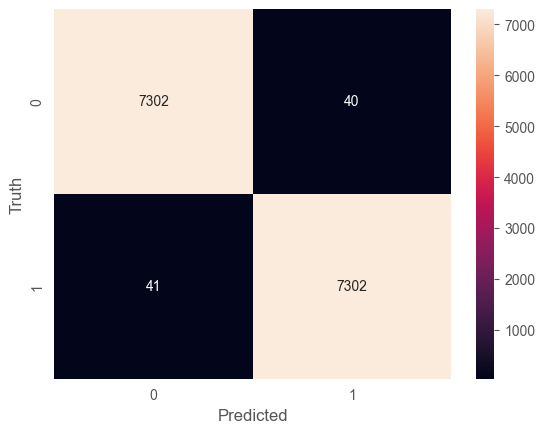

In [122]:
sns.heatmap(cm, annot=True, fmt='d')
mt.xlabel('Predicted')
mt.ylabel('Truth')

In [123]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7342
           1       0.99      0.99      0.99      7343

    accuracy                           0.99     14685
   macro avg       0.99      0.99      0.99     14685
weighted avg       0.99      0.99      0.99     14685



In [124]:
reviews = [
    "Utterly Disappointed",
    "Worst Product i have ever seen",
    "Worth Purchase",
    "Super!",
    "Making shopping feel like a punishment.",
    "Where your orders go to vanish into thin air",
    "Excellent quality and durability, worth every penny!",
    "Sleek design and leak-proof, perfect for on-the-go hydration.",
    "Lightweight and compact, fits perfectly in my bag or backpack.",
    "Shut up just say jai shree ram",
    "This is the worst i have seen"
    "Marvellous Product",
    "Best Purchase ever",
    "Worth every penny"
]
model.predict(reviews)

1/1 [==============================] - 4s 4s/step


array([[9.8789132e-01],
       [9.9988347e-01],
       [4.8108384e-01],
       [1.2963628e-04],
       [2.9187185e-01],
       [8.6059803e-01],
       [3.2221705e-03],
       [2.9236180e-04],
       [1.8879799e-03],
       [1.1025884e-01],
       [9.9382746e-01],
       [6.0934252e-03],
       [1.7256357e-02]], dtype=float32)